In [4]:
"""Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning
technique which aggregates the results of multiple de-correlated decision trees collected in
a “forest” to output it’s classification result. In concept, it is very similar to a
Random Forest Classifier and only differs from it in the manner of construction of the decision
trees in the forest.

Each Decision Tree in the Extra Trees Forest is constructed from the original training sample. 
Then, at each test node, Each tree is provided with a random sample of k features from the 
feature-set from which each decision tree must select the best feature to split the data based
on some mathematical criteria (typically the Gini Index). This random sample of features leads
to the creation of multiple de-correlated decision trees.
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Loading the data
df = pd.read_csv('FeatureImportance.csv')
df.head()

,outlook,temperature,huminity,wind,PlayTennis
0,1,1,1,1,0
1,1,1,1,0,0
2,2,1,1,1,1
3,3,2,1,1,1
4,3,3,2,1,1


In [6]:
# Separating the dependent and independent variables
y = df['PlayTennis']
X = df.drop('PlayTennis', axis = 1)
  
X.head()

,outlook,temperature,huminity,wind
0,1,1,1,1
1,1,1,1,0
2,2,1,1,1
3,3,2,1,1
4,3,3,2,1


In [15]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                         criterion ='entropy', 
                                         max_depth=None, 
                                         max_features = 2, 
                                         bootstrap=True, 
                                         oob_score=False,
                                         verbose=2,
                                         class_weight="balanced")
  
# Training the model
extra_tree_forest.fit(X, y)
  
# Retreive relevant feature info.
n_outputs = extra_tree_forest.n_outputs_
feature_importance = extra_tree_forest.feature_importances_
#oob_score = extra_tree_forest.oob_score_
  
"""Normalizing the individual importances. Standard deviation, a measure of the spread of a distribution,
of the array elements."""
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

building tree 1 of 5
building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [16]:
print(feature_importance_normalized, n_outputs)

[1.90228307e-01 1.06780883e-16 1.83751724e-01 1.53242658e-01] 1


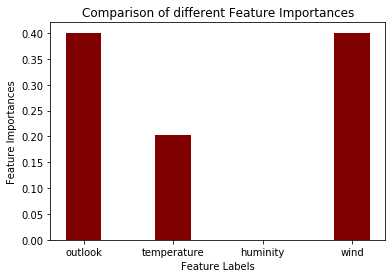

In [14]:
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized, color='maroon', width=0.4)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()